<a href="https://colab.research.google.com/github/Bhavita2501/DAB-103/blob/main/26_april_state_level_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
project_dir = 'drive/MyDrive/DAB-103-main/DAB-103-main/'

In [4]:
df=pd.read_csv(project_dir+ 'state_level_latest.csv')
df

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,2025409,1377384,41638,605933,06/08/2020 23:46:37,454,TT,0,0,0,NaN
1,Maharashtra,479779,316375,16792,146305,06/08/2020 20:42:51,307,MH,0,0,0,307 cases are marked as non-covid deaths in MH...
2,Tamil Nadu,279144,221087,4571,53486,06/08/2020 19:44:47,0,TN,0,0,0,[July 22]: 444 backdated deceased entries adde...
3,Delhi,141531,127124,4059,10348,06/08/2020 18:39:45,0,DL,0,0,0,[July 14]: Value for the total tests conducted...
4,Karnataka,158254,80281,2897,75067,06/08/2020 21:19:51,9,KA,0,0,0,NaN
5,Andhra Pradesh,196789,112870,1753,82166,06/08/2020 19:45:03,0,AP,0,0,0,Total includes patients from other states and ...
6,Uttar Pradesh,108974,63402,1918,43654,06/08/2020 17:53:49,0,UP,0,0,0,NaN
7,Gujarat,67811,50524,2579,14708,06/08/2020 21:28:40,0,GJ,0,0,0,NaN
8,West Bengal,86754,61023,1902,23829,06/08/2020 21:28:42,0,WB,0,0,0,NaN
9,Telangana,73050,52103,589,20358,06/08/2020 11:26:06,0,TG,0,0,0,[July 27]\nTelangana bulletin for the previous...


In [5]:
df.shape

(38, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              38 non-null     object
 1   Confirmed          38 non-null     int64 
 2   Recovered          38 non-null     int64 
 3   Deaths             38 non-null     int64 
 4   Active             38 non-null     int64 
 5   Last_Updated_Time  38 non-null     object
 6   Migrated_Other     38 non-null     int64 
 7   State_code         38 non-null     object
 8   Delta_Confirmed    38 non-null     int64 
 9   Delta_Recovered    38 non-null     int64 
 10  Delta_Deaths       38 non-null     int64 
 11  State_Notes        15 non-null     object
dtypes: int64(8), object(4)
memory usage: 3.7+ KB


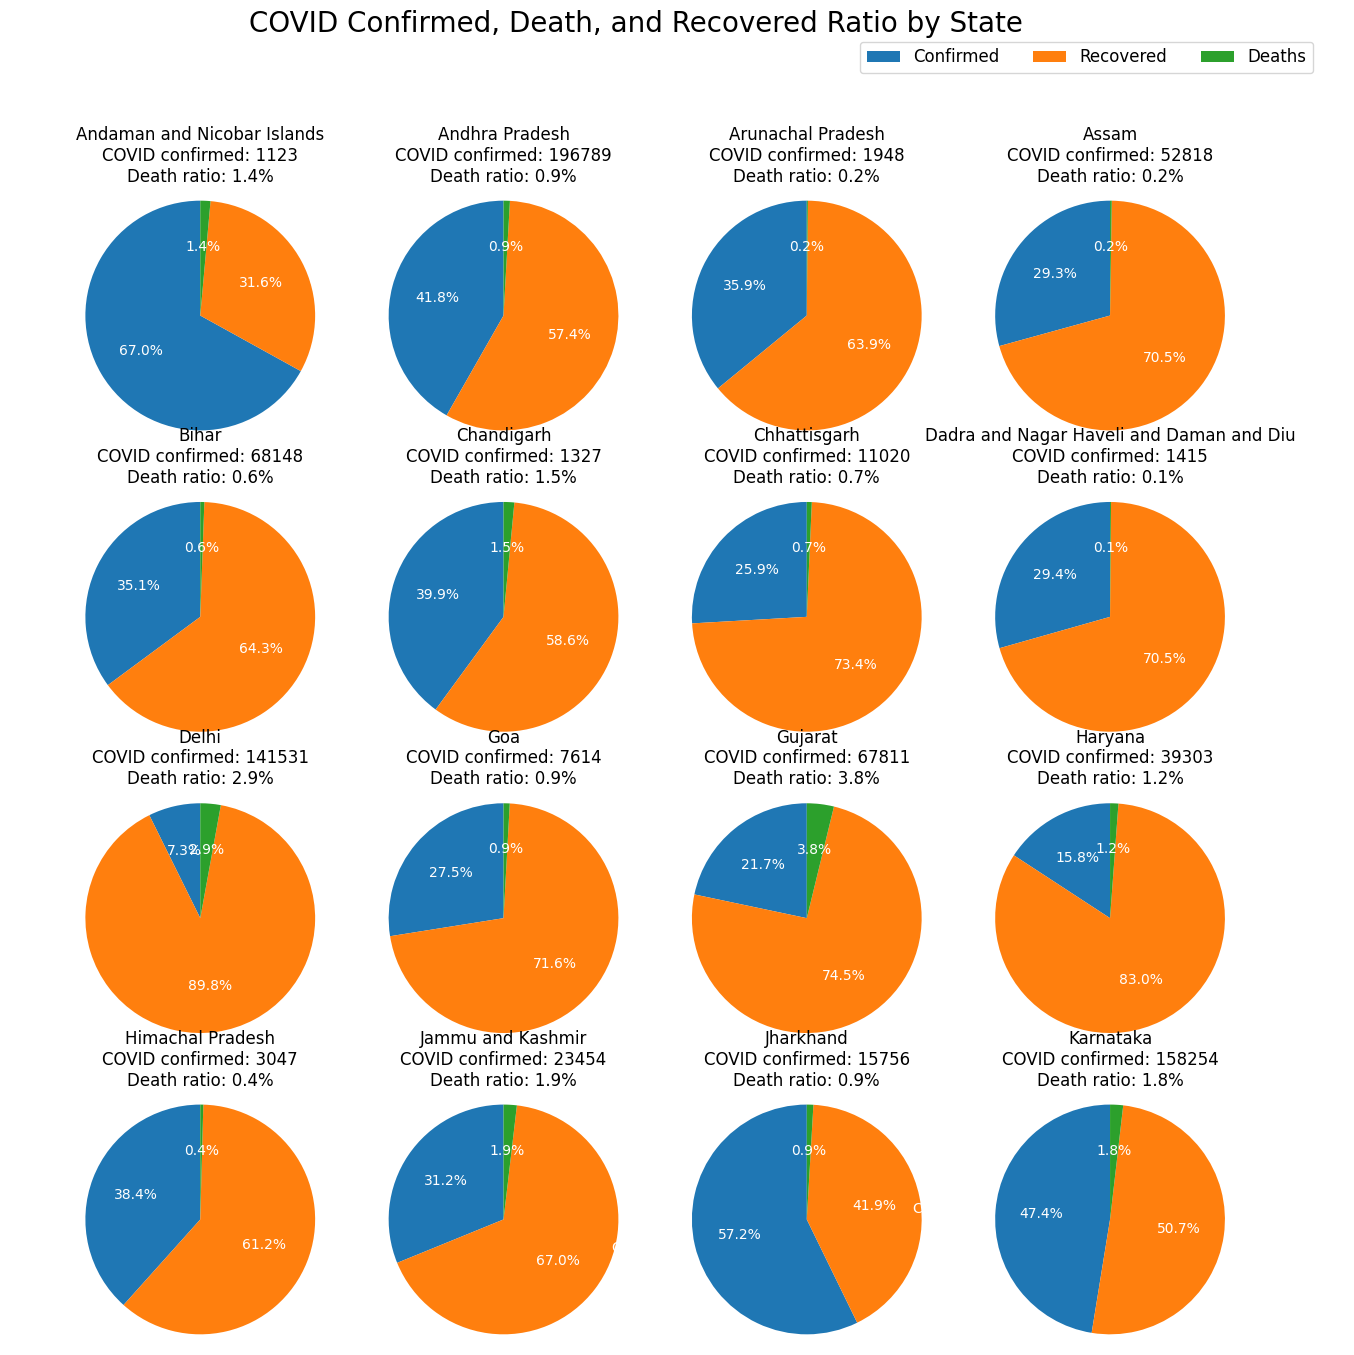

In [46]:
# Group by state
state_groups = df.groupby('State')

# Loop through each state group and create a pie chart
fig = plt.figure(figsize=(15, 15))
row = 0
for state, state_df in state_groups:
    # Calculate percentages for each category
    total = state_df['Confirmed'].sum()
    recovered = state_df['Recovered'].sum()
    deaths = state_df['Deaths'].sum()
    if total == 0:
        continue
    recovered_perc = recovered / total * 100
    deaths_perc = deaths / total * 100
    confirmed_perc = 100 - recovered_perc - deaths_perc
    
    # Create the pie chart
    labels = ['Confirmed', 'Recovered', 'Deaths']
    sizes = [confirmed_perc, recovered_perc, deaths_perc]
    ax = fig.add_subplot(4, 4, row+1)
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'color': 'white'})
    ax.axis('equal')
    ax.set_title(f"{state}\nCOVID confirmed: {total}\nDeath ratio: {deaths_perc:.1f}%", color='black')
    row += 1
    if row == 16:
        break

# Add a bit of space between the main title and the first row
plt.subplots_adjust(top=0.88)

plt.suptitle('COVID Confirmed, Death, and Recovered Ratio by State\n', fontsize=20, y=1.0)
# Add a common legend
fig.legend(labels=labels, loc='upper right', ncol=3, fontsize=12, borderaxespad=2.5)

plt.show()
